In [1]:
# from google.colab import drive
# drive.mount('/content/drive/')

# %cd /content/drive/MyDrive/Colab Notebooks/Kaggle Tubular Playground Series/S4E8 Binary Prediction of Poisonous Mushrooms/

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import eda_util

In [3]:
random_state = 1048576

# Data Loading

In [4]:
test_csv = pd.read_csv('test.csv', index_col=0)
train_csv = pd.read_csv('train.csv', index_col=0)

In [5]:
train_csv.head()

person_age  person_income person_home_ownership  person_emp_length  \
id                                                                       
0           37          35000                  RENT                0.0   
1           22          56000                   OWN                6.0   
2           29          28800                   OWN                8.0   
3           30          70000                  RENT               14.0   
4           22          60000                  RENT                2.0   

   loan_intent loan_grade  loan_amnt  loan_int_rate  loan_percent_income  \
id                                                                         
0    EDUCATION          B       6000          11.49                 0.17   
1      MEDICAL          C       4000          13.35                 0.07   
2     PERSONAL          A       6000           8.90                 0.21   
3      VENTURE          B      12000          11.11                 0.17   
4      MEDICAL          A       6000           6.92                 0.10   

   cb_person_default_on_file  cb_person_cred_hist_length  loan_status  
id                                                                     
0                          N                          14            0  
1                          N                           2            0  
2                          N                          10            0  
3                          N                           5            0  
4                          N                           3            0

In [6]:
train_csv.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58645 entries, 0 to 58644
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  58645 non-null  int64  
 1   person_income               58645 non-null  int64  
 2   person_home_ownership       58645 non-null  object 
 3   person_emp_length           58645 non-null  float64
 4   loan_intent                 58645 non-null  object 
 5   loan_grade                  58645 non-null  object 
 6   loan_amnt                   58645 non-null  int64  
 7   loan_int_rate               58645 non-null  float64
 8   loan_percent_income         58645 non-null  float64
 9   cb_person_default_on_file   58645 non-null  object 
 10  cb_person_cred_hist_length  58645 non-null  int64  
 11  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 5.8+ MB


# Data descriptions

## NA values

In [7]:
train_csv.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

In [8]:
test_csv.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

## Categorical Features

In [9]:
mask = train_csv.apply(lambda s: ~pd.to_numeric(s, errors='coerce').notnull().all()) # Checking whether the columns are numeric or not
train_csv[train_csv.columns[mask]].nunique() # Number of unique classes in categorical features

person_home_ownership        4
loan_intent                  6
loan_grade                   7
cb_person_default_on_file    2
dtype: int64

In [10]:
cat_features = train_csv.columns[mask].to_list()
num_features = [feature for feature in train_csv.columns if feature not in cat_features + ['loan_status']]
print(f'Categorical features are: {cat_features}')
print(f'Numerical features are: {num_features}')

Categorical features are: ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
Numerical features are: ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']


In [11]:
for feature in cat_features:
    print(f'Unique values for {feature} is: {train_csv[feature].unique()}')

Unique values for person_home_ownership is: ['RENT' 'OWN' 'MORTGAGE' 'OTHER']
Unique values for loan_intent is: ['EDUCATION' 'MEDICAL' 'PERSONAL' 'VENTURE' 'DEBTCONSOLIDATION'
 'HOMEIMPROVEMENT']
Unique values for loan_grade is: ['B' 'C' 'A' 'D' 'E' 'F' 'G']
Unique values for cb_person_default_on_file is: ['N' 'Y']


In [12]:
for feature in cat_features:
    print(f'Unique values for {feature} is: {test_csv[feature].unique()}')

Unique values for person_home_ownership is: ['RENT' 'MORTGAGE' 'OWN' 'OTHER']
Unique values for loan_intent is: ['HOMEIMPROVEMENT' 'PERSONAL' 'VENTURE' 'DEBTCONSOLIDATION' 'EDUCATION'
 'MEDICAL']
Unique values for loan_grade is: ['F' 'C' 'E' 'A' 'D' 'B' 'G']
Unique values for cb_person_default_on_file is: ['N' 'Y']


## Numerical Features

In [13]:
train_csv.describe()

person_age  person_income  person_emp_length     loan_amnt  \
count  58645.000000   5.864500e+04       58645.000000  58645.000000   
mean      27.550857   6.404617e+04           4.701015   9217.556518   
std        6.033216   3.793111e+04           3.959784   5563.807384   
min       20.000000   4.200000e+03           0.000000    500.000000   
25%       23.000000   4.200000e+04           2.000000   5000.000000   
50%       26.000000   5.800000e+04           4.000000   8000.000000   
75%       30.000000   7.560000e+04           7.000000  12000.000000   
max      123.000000   1.900000e+06         123.000000  35000.000000   

       loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
count   58645.000000         58645.000000                58645.000000   
mean       10.677874             0.159238                    5.813556   
std         3.034697             0.091692                    4.029196   
min         5.420000             0.000000                    2.000000   
25%         7.880000             0.090000                    3.000000   
50%        10.750000             0.140000                    4.000000   
75%        12.990000             0.210000                    8.000000   
max        23.220000             0.830000                   30.000000   

        loan_status  
count  58645.000000  
mean       0.142382  
std        0.349445  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

In [14]:
test_csv.describe()

person_age  person_income  person_emp_length     loan_amnt  \
count  39098.000000   3.909800e+04       39098.000000  39098.000000   
mean      27.566781   6.406046e+04           4.687068   9251.466188   
std        6.032761   3.795583e+04           3.868395   5576.254680   
min       20.000000   4.000000e+03           0.000000    700.000000   
25%       23.000000   4.200000e+04           2.000000   5000.000000   
50%       26.000000   5.800000e+04           4.000000   8000.000000   
75%       30.000000   7.588500e+04           7.000000  12000.000000   
max       94.000000   1.900000e+06          42.000000  35000.000000   

       loan_int_rate  loan_percent_income  cb_person_cred_hist_length  
count   39098.000000         39098.000000                39098.000000  
mean       10.661216             0.159573                    5.830707  
std         3.020220             0.091633                    4.072157  
min         5.420000             0.000000                    2.000000  
25%         7.880000             0.090000                    3.000000  
50%        10.750000             0.140000                    4.000000  
75%        12.990000             0.210000                    8.000000  
max        22.110000             0.730000                   30.000000

# Data Visualizations

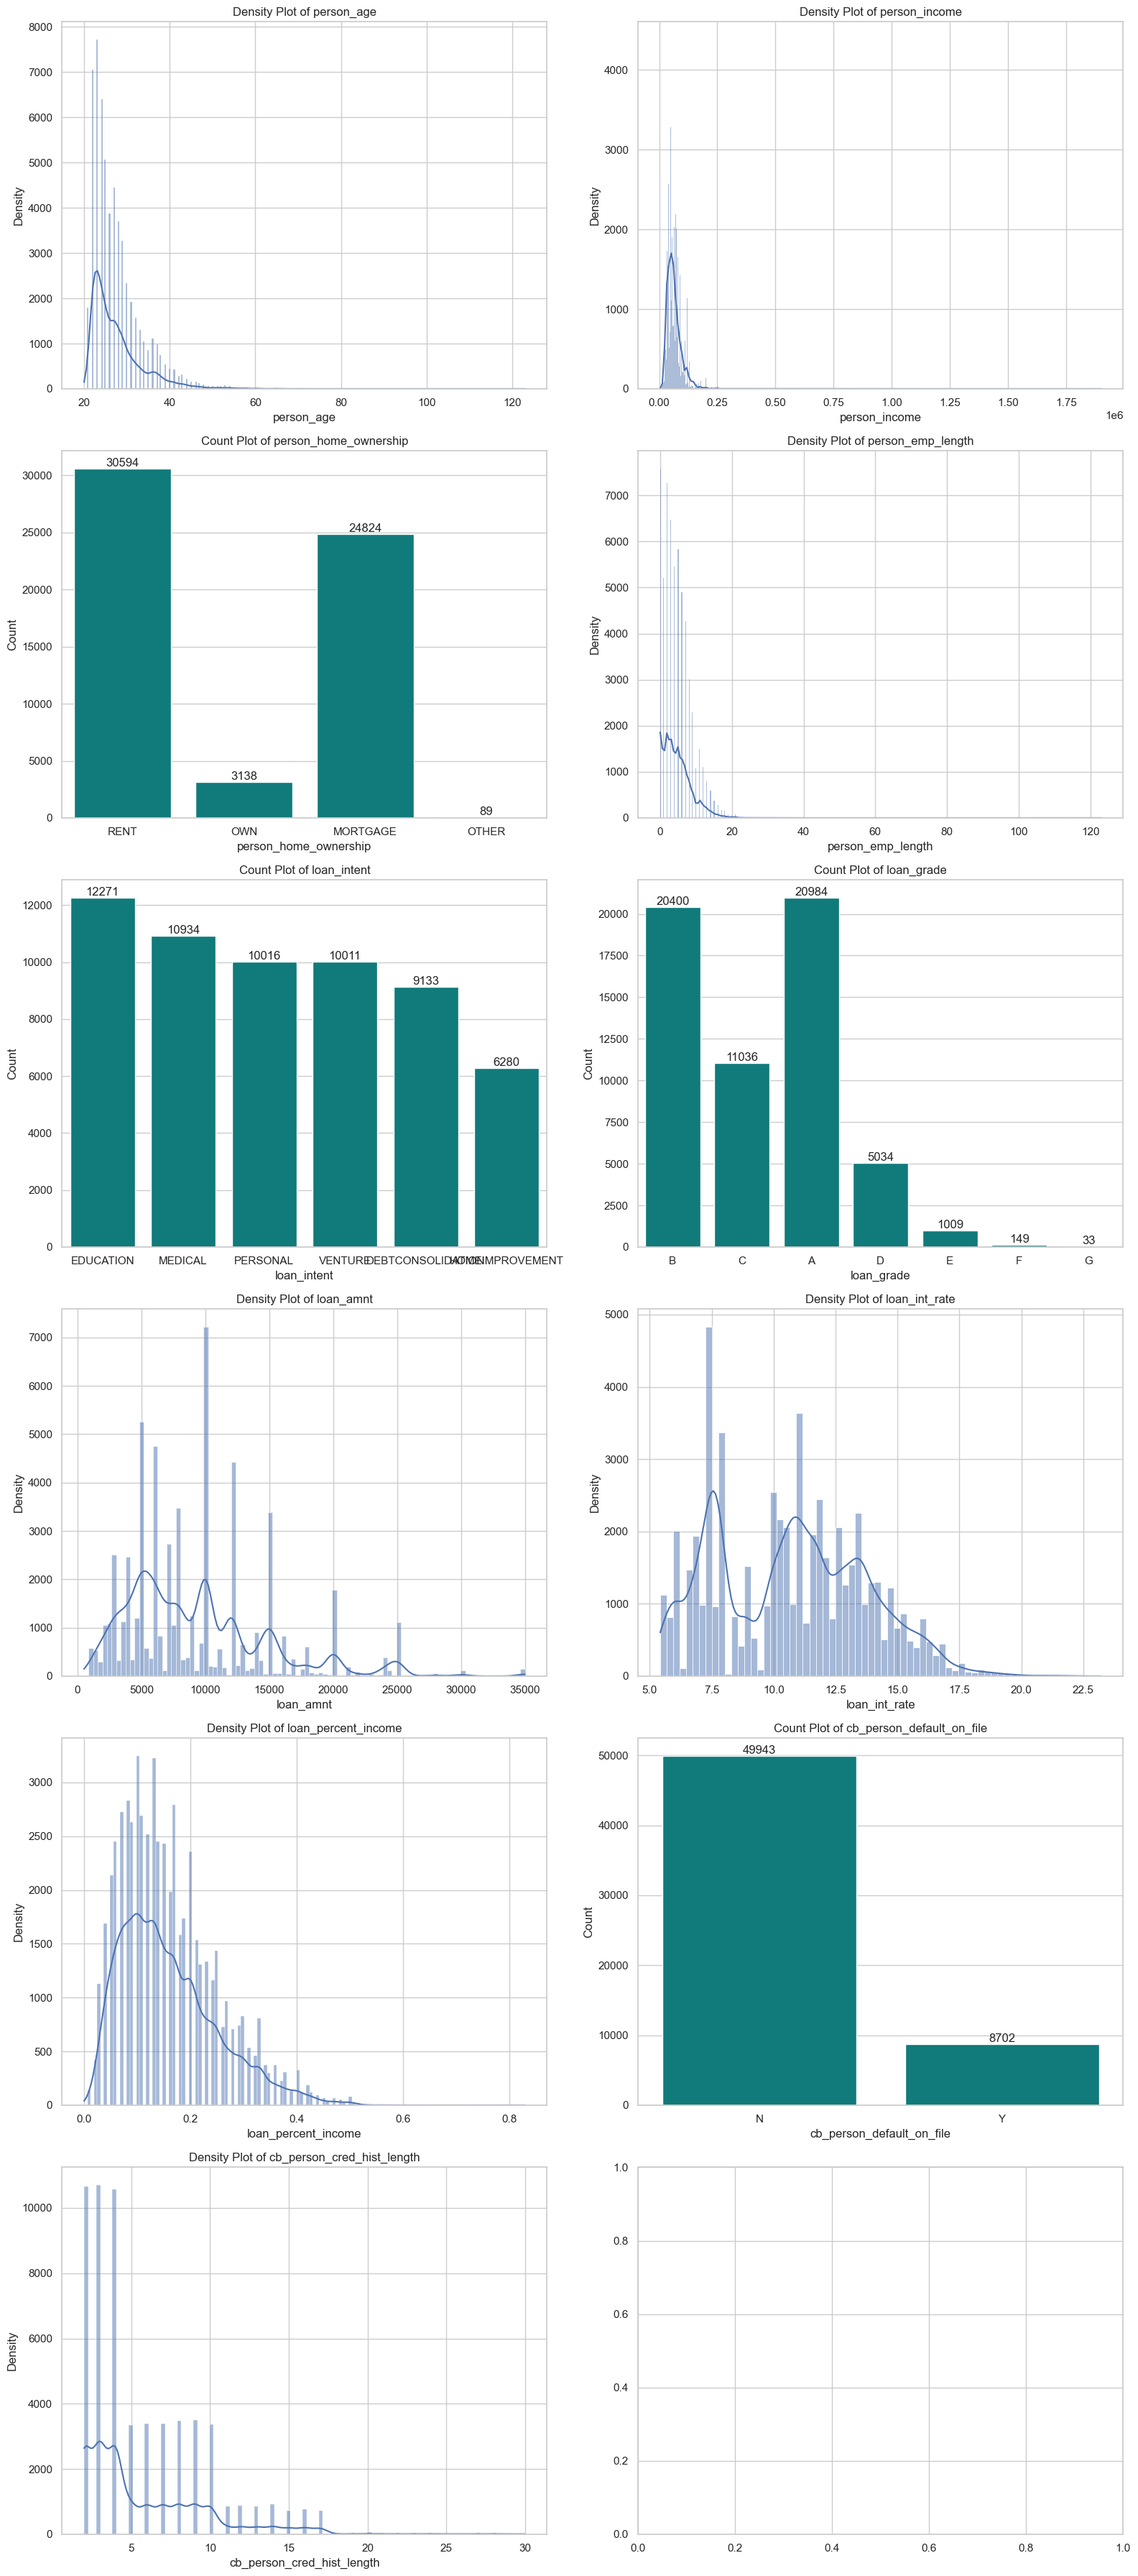

In [15]:
train_csv[num_features] = train_csv[num_features].astype('float64')
eda_util.plots.distributionPlots(train_csv, drop='loan_status')

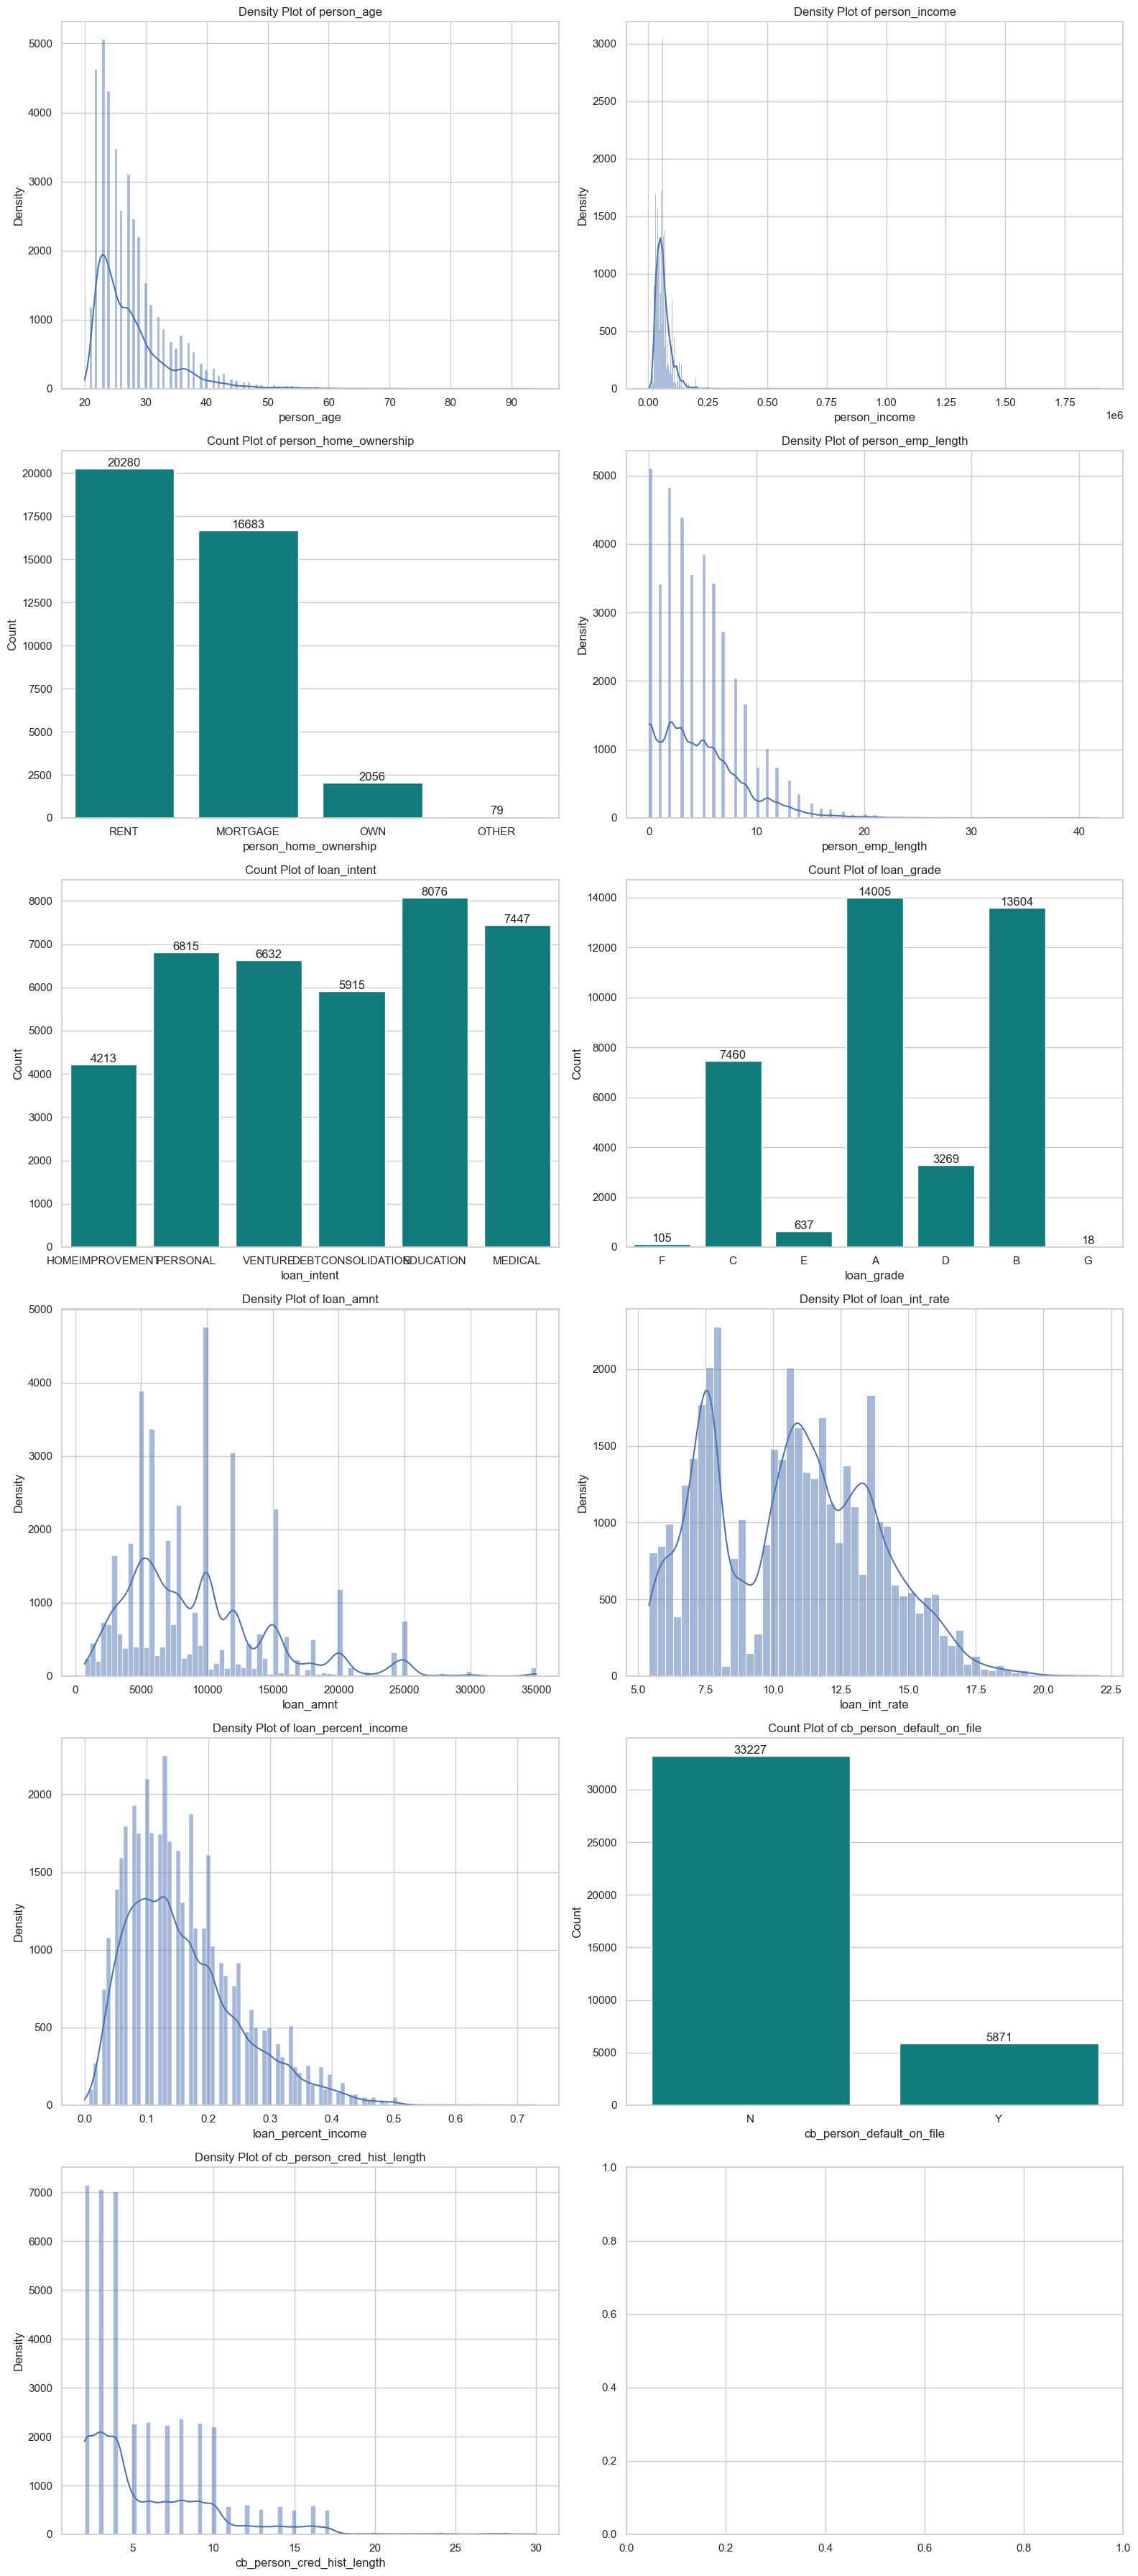

In [16]:
test_csv[num_features] = test_csv[num_features].astype('float64')
eda_util.plots.distributionPlots(test_csv)

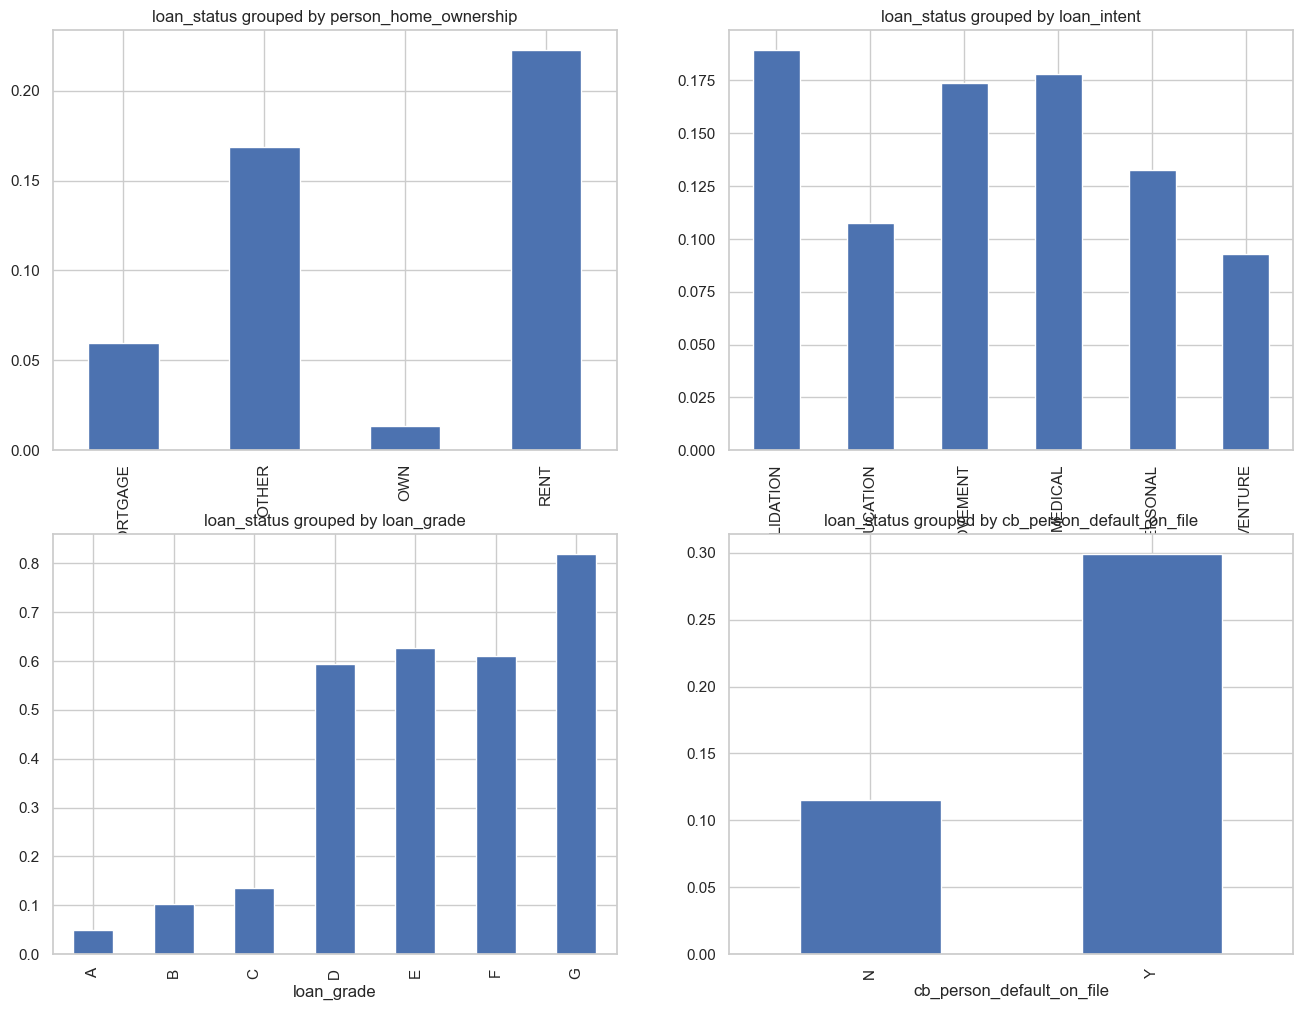

In [17]:
fig, axe = plt.subplots(2, 2, figsize=(16, 12))
for i, feature in enumerate(cat_features):
    row = i // 2
    col = i % 2
    train_csv.groupby(by=feature)['loan_status'].apply(lambda x: x.sum()/x.count()).plot(kind='bar', ax=axe[row, col]).set_title(f'loan_status grouped by {feature}')

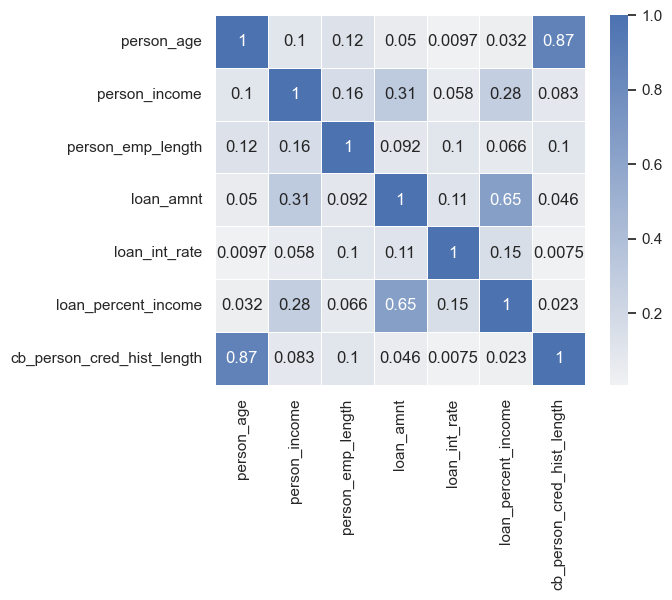

In [18]:
eda_util.correlations.featuresCorr(train_csv, num_features)

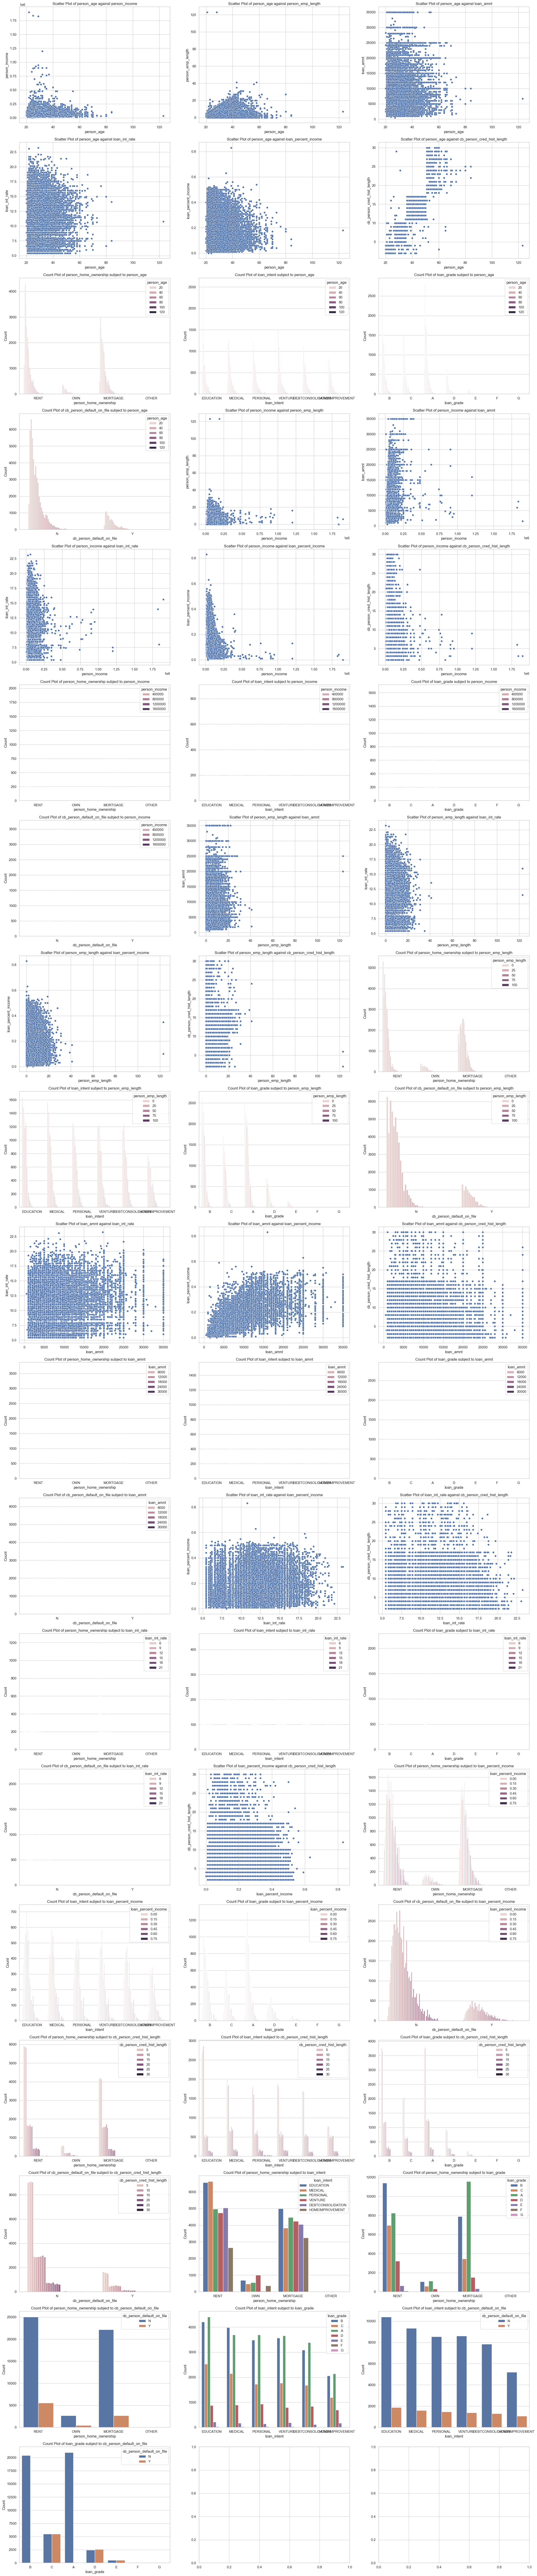

In [19]:
import eda_util
import importlib

# reload eda_util.py file to reflect the changes

importlib.reload(eda_util)


eda_util.correlations.pairwiseCorr(train_csv, target='loan_status')

## Discrepancy between calculated loan_amnt and actual loan_amnt

In [20]:
loan_income = train_csv[['person_income' ,'loan_percent_income', 'loan_amnt']].copy()
loan_income['cal_loan_amnt'] = loan_income['person_income'] * loan_income['loan_percent_income']
loan_income['diff'] = loan_income['cal_loan_amnt'] - loan_income['loan_amnt']
loan_income['percent_diff'] = round(loan_income['diff'] / loan_income['cal_loan_amnt'] * 100, 2)
loan_income.head()

person_income  loan_percent_income  loan_amnt  cal_loan_amnt   diff  \
id                                                                        
0         35000.0                 0.17     6000.0         5950.0  -50.0   
1         56000.0                 0.07     4000.0         3920.0  -80.0   
2         28800.0                 0.21     6000.0         6048.0   48.0   
3         70000.0                 0.17    12000.0        11900.0 -100.0   
4         60000.0                 0.10     6000.0         6000.0    0.0   

    percent_diff  
id                
0          -0.84  
1          -2.04  
2           0.79  
3          -0.84  
4           0.00

In [21]:
loan_income[loan_income['percent_diff'] > 50]

person_income  loan_percent_income  loan_amnt  cal_loan_amnt  \
id                                                                    
4230         75000.0                 0.14     1075.0       10500.00   
4455         95004.0                 0.26     2225.0       24701.04   
9488        120000.0                 0.08     1000.0        9600.00   
11422       948000.0                 0.04     4000.0       37920.00   
11999       158004.0                 0.32     5000.0       50561.28   
12404      1839784.0                 0.04     8000.0       73591.36   
12610       510000.0                 0.04     1800.0       20400.00   
13872        77300.0                 0.24     1807.0       18552.00   
15679       400000.0                 0.22     9000.0       88000.00   
17783        50000.0                 0.32     1750.0       16000.00   
18364       130000.0                 0.23     3000.0       29900.00   
19060      1200000.0                 0.13    16000.0      156000.00   
19410        40000.0                 0.33     1400.0       13200.00   
19450       120775.0                 0.30     3600.0       36232.50   
20120       612000.0                 0.12     7000.0       73440.00   
20222       280000.0                 0.04     1000.0       11200.00   
20271       305000.0                 0.07     2000.0       21350.00   
20632       382000.0                 0.25     9600.0       95500.00   
22203       213000.0                 0.11     2400.0       23430.00   
24325       397800.0                 0.36    14000.0      143208.00   
25390        39000.0                 0.33     1300.0       12870.00   
25959       889000.0                 0.05     4000.0       44450.00   
26484       130000.0                 0.35     4800.0       45500.00   
26534        98004.0                 0.39     3600.0       38221.56   
28328       410000.0                 0.23     8875.0       94300.00   
29451       350000.0                 0.14     4800.0       49000.00   
31093       180000.0                 0.11     2000.0       19800.00   
32512        90000.0                 0.10     1000.0        9000.00   
33165        77100.0                 0.41     3500.0       31611.00   
34007       350000.0                 0.06     2000.0       21000.00   
34752       928000.0                 0.01     2850.0        9280.00   
35808       390000.0                 0.15     6000.0       58500.00   
37534       232050.0                 0.26     6000.0       60333.00   
37591      1824000.0                 0.03     6000.0       54720.00   
38110        90000.0                 0.10     1000.0        9000.00   
38249       110000.0                 0.26     3000.0       28600.00   
38295       130000.0                 0.23     3000.0       29900.00   
38928       120000.0                 0.35     4375.0       42000.00   
40429       136092.0                 0.09     1400.0       12248.28   
41278       130000.0                 0.27     3500.0       35100.00   
42939       700000.0                 0.03     2000.0       21000.00   
45328        37680.0                 0.40     1500.0       15072.00   
45474       250000.0                 0.10     2500.0       25000.00   
46500       381450.0                 0.09     3500.0       34330.50   
46986       828000.0                 0.06     4800.0       49680.00   
48199       225000.0                 0.22     5000.0       49500.00   
50649       168000.0                 0.09     1500.0       15120.00   
50761       115000.0                 0.27     3250.0       31050.00   
51826       113000.0                 0.21     2525.0       23730.00   
53056       762000.0                 0.13    10000.0       99060.00   
54980        69000.0                 0.59     3775.0       40710.00   
57086       200000.0                 0.13     2800.0       26000.00   
58340        48996.0                 0.19     1000.0        9309.24   

            diff  percent_diff  
id                              
4230     9425.00         89.76  
44

In [26]:
loan_income[loan_income['percent_diff'] < -50].sort_values(by='percent_diff')

person_income  loan_percent_income  loan_amnt  cal_loan_amnt      diff  \
id                                                                              
17387      1900000.0                 0.00     1500.0           0.00  -1500.00   
50049        30000.0                 0.00     3200.0           0.00  -3200.00   
37345        69743.0                 0.01    10000.0         697.43  -9302.57   
38167        57996.0                 0.01     7625.0         579.96  -7045.04   
54855        36960.0                 0.04    18000.0        1478.40 -16521.60   
...              ...                  ...        ...            ...       ...   
29893       225000.0                 0.01     3600.0        2250.00  -1350.00   
57587        73164.0                 0.01     1150.0         731.64   -418.36   
4557        480000.0                 0.01     7500.0        4800.00  -2700.00   
16134       225000.0                 0.01     3500.0        2250.00  -1250.00   
15454       468000.0                 0.01     7200.0        4680.00  -2520.00   

       percent_diff  
id                   
17387          -inf  
50049          -inf  
37345      -1333.84  
38167      -1214.75  
54855      -1117.53  
...             ...  
29893        -60.00  
57587        -57.18  
4557         -56.25  
16134        -55.56  
15454        -53.85  

[67 rows x 6 columns]

Looking at the table, it seems the some loan_amnt was incorrectly input as 1/10 of the intended value.

## Discrepancy between age, emp_year and cred_hist_length

In [23]:
work_time = train_csv[['person_age', 'person_emp_length', 'cb_person_cred_hist_length']].copy()
work_time['start_working_age'] = work_time['person_age'] - work_time['person_emp_length']
work_time['start_cred'] = work_time['person_age'] - work_time['cb_person_cred_hist_length']
work_time[work_time['start_working_age'] < 14] # US legal working age starts at 14

person_age  person_emp_length  cb_person_cred_hist_length  \
id                                                                 
699          30.0               19.0                         8.0   
746          23.0               17.0                         3.0   
3072         24.0               12.0                         2.0   
8222         26.0               13.0                         3.0   
12638        32.0               21.0                         6.0   
15921        27.0               14.0                         7.0   
16378        36.0               24.0                        17.0   
17542        38.0               27.0                        13.0   
17861        33.0               21.0                         7.0   
18293        23.0               10.0                         3.0   
18783        22.0               13.0                         3.0   
20615        21.0                8.0                         3.0   
24214        43.0               35.0                        16.0   
26125        43.0               41.0                        14.0   
32236        23.0               15.0                         4.0   
33012        24.0               14.0                         3.0   
34852        36.0               24.0                        11.0   
41079        28.0              123.0                         6.0   
41912        23.0               21.0                         2.0   
43518        25.0               19.0                         4.0   
48118        33.0               21.0                         5.0   
48185        23.0               10.0                         3.0   
48915        22.0               10.0                         3.0   
49252        21.0              123.0                         2.0   
52038        38.0               31.0                        14.0   
53992        23.0               11.0                         2.0   
56176        37.0               28.0                        11.0   
58602        23.0               14.0                         2.0   

       start_working_age  start_cred  
id                                    
699                 11.0        22.0  
746                  6.0        20.0  
3072                12.0        22.0  
8222                13.0        23.0  
12638               11.0        26.0  
15921               13.0        20.0  
16378               12.0        19.0  
17542               11.0        25.0  
17861               12.0        26.0  
18293               13.0        20.0  
18783                9.0        19.0  
20615               13.0        18.0  
24214                8.0        27.0  
26125                2.0        29.0  
32236                8.0        19.0  
33012               10.0        21.0  
34852               12.0        25.0  
41079              -95.0        22.0  
41912                2.0        21.0  
43518                6.0        21.0  
48118               12.0        28.0  
48185               13.0        20.0  
48915               12.0        19.0  
49252             -102.0        19.0  
52038                7.0        24.0  
53992               12.0        21.0  
56176                9.0        26.0  
58602                9.0        21.0